
# Практика 01 — Часть 2: Градиентный спуск для линейной регрессии

В этой части мы разберём **градиентный спуск** как общий метод оптимизации и применим его к линейной регрессии.

Цели:
- понять, что такое **итерационный метод оптимизации**;
- вывести формулы градиента для MSE в 1D и многомерном случае;
- реализовать градиентный спуск руками;
- визуально увидеть, как модель «спускается» по поверхности потерь;
- обсудить **шаг обучения**, **сходимость**, **batch / stochastic / mini-batch** варианты;
- показать влияние **масштаба признаков** на скорость обучения.


## 0. Подготовка окружения

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

rng = np.random.default_rng(42)
np.set_printoptions(precision=4, suppress=True)



## 1. Оптимизация и идея градиентного спуска

В предыдущей части мы видели **аналитическое решение** для линейной регрессии с MSE.  
Однако, во многих моделях такого решения **нет** (нейросети, сложные модели).

Нам нужен **универсальный численный метод**, который:

- стартует с начального приближения параметров $\theta^{(0)}$;
- **улучшает** их шаг за шагом, уменьшая функцию потерь $L(\theta)$;
- останавливается, когда мы достаточно близко к минимуму.

Такой метод — **градиентный спуск (gradient descent)**.



Идея:

1. Вычисляем градиент функции потерь в текущей точке:
   $$
   g^{(k)} = \nabla_\theta L(\theta^{(k)}).
   $$
   (градиент - это вектор частных производных!)
2. Делаем шаг **в сторону убывания** потерь (против градиента):
   $$
   \theta^{(k+1)} = \theta^{(k)} - \eta \, g^{(k)}.
   $$

Здесь:
- $\theta$ — вектор параметров (например, веса линейной модели);
- $\eta > 0$ — **шаг обучения (learning rate)**;
- $k$ — номер итерации.

Градиент показывает направление **максимального роста** функции,  
поэтому шагая в противоположную сторону, мы стремимся **уменьшать** $L(\theta)$.


In [47]:
# Смотри отдельный ноутбук по градиентам


## 2. Градиентный спуск для линейной регрессии в 1D

Начнём с простого случая: одна переменная $x$, модель:

$$
\hat y_i = w x_i + b.
$$

Функция потерь (MSE):

$$
L(w,b) = \frac{1}{n} \sum_{i=1}^n (w x_i + b - y_i)^2.
$$

Наша задача — вывести $\frac{\partial L}{\partial w}$ и $\frac{\partial L}{\partial b}$ и записать правила обновления.



### 2.1 Вывод градиента по $w$ и $b$

Обозначим ошибку на $i$-м объекте:

$$
e_i = w x_i + b - y_i.
$$

Тогда

$$
L(w,b) = \frac{1}{n} \sum_{i=1}^n e_i^2.
$$

Частная производная по $w$:

$$
\frac{\partial L}{\partial w}
= \frac{1}{n} \sum_{i=1}^n 2 e_i \frac{\partial e_i}{\partial w}
= \frac{2}{n} \sum_{i=1}^n e_i x_i.
$$

Аналогично по $b$:

$$
\frac{\partial L}{\partial b}
= \frac{1}{n} \sum_{i=1}^n 2 e_i \frac{\partial e_i}{\partial b}
= \frac{2}{n} \sum_{i=1}^n e_i,
$$

так как $\frac{\partial e_i}{\partial b} = 1$.



Итак, получаем:

$$
\frac{\partial L}{\partial w} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i) x_i,
\qquad
\frac{\partial L}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i).
$$

**Правила обновления (batch gradient descent):**

$$
w^{(k+1)} = w^{(k)} - \eta \, \frac{\partial L}{\partial w}(w^{(k)}, b^{(k)}),
$$

$$
b^{(k+1)} = b^{(k)} - \eta \, \frac{\partial L}{\partial b}(w^{(k)}, b^{(k)}).
$$

На каждом шаге используем **все** объекты выборки (поэтому это batch-gradient).



### 2.2 Пример: 1D данные и путь градиентного спуска

Сгенерируем простые данные по истинной прямой:

$$
y = w_{\text{true}} x + b_{\text{true}} + \varepsilon,
$$

и посмотрим, как градиентный спуск приближается к истинным параметрам.


Итоговые параметры (GD): w=2.560, b=1.005
Истинные параметры:      w=2.500, b=1.000


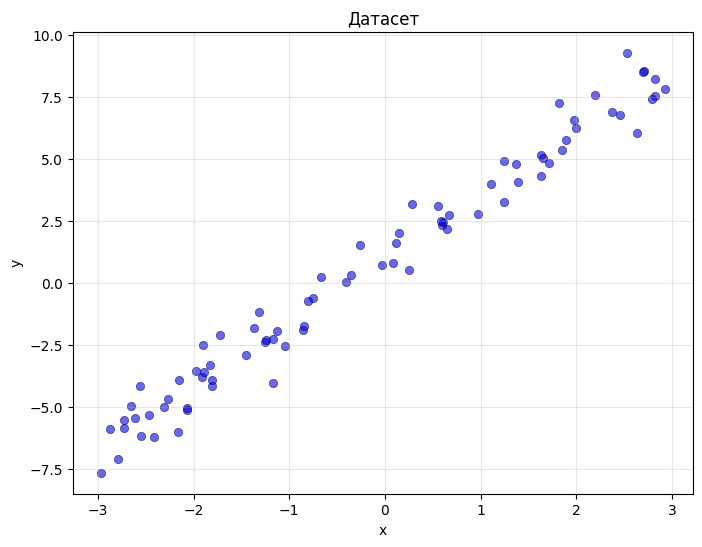

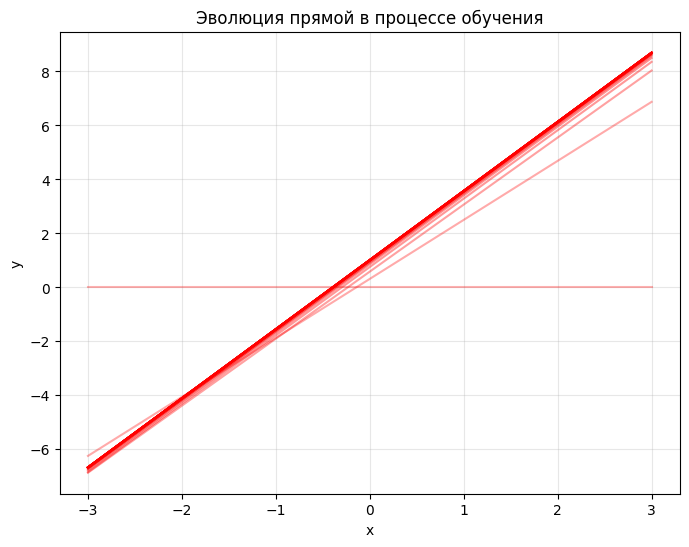

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Для воспроизводимости
rng = np.random.RandomState(42)

# Синтетические данные для 1D
n = 80
w_true = 2.5
b_true = 1.0

x = rng.uniform(-3, 3, size=n)
eps = rng.normal(0, 0.8, size=n)
y = w_true * x + b_true + eps

# Градиентный спуск
def compute_gradients(w, b, x, y):
    n = x.shape[0]
    y_pred = w * x + b
    errors = y_pred - y
    dw = (2.0 / n) * np.sum(errors * x)
    db = (2.0 / n) * np.sum(errors)
    return dw, db

w = 0.0
b = 0.0
lr = 0.05
num_iters = 100

history_w = [w]
history_b = [b]
history_loss = []

for k in range(num_iters):
    y_pred = w * x + b
    loss = np.mean((y_pred - y)**2)
    history_loss.append(loss)

    dw, db = compute_gradients(w, b, x, y)
    w -= lr * dw
    b -= lr * db
    history_w.append(w)
    history_b.append(b)

print("Итоговые параметры (GD): w=%.3f, b=%.3f" % (w, b))
print("Истинные параметры:      w=%.3f, b=%.3f" % (w_true, b_true))

# ------------- ВИЗУАЛИЗАЦИИ ---------------

# График 1: Датасет
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, color='blue', edgecolors='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Датасет')
plt.grid(True, alpha=0.3)
plt.show()

# График 2: Изменение прямой от бледного к яркому
plt.figure(figsize=(8, 6))
x_line = np.linspace(-3, 3, 100)

# Берем каждую step-ую итерацию для наглядности
step = 5
alphas = np.linspace(0.3, 1.0, len(history_w[::step]))

for i, (wi, bi, alpha) in enumerate(zip(history_w[::step], history_b[::step], alphas)):
    y_line = wi * x_line + bi
    plt.plot(x_line, y_line, color='red', alpha=alpha, linewidth=1.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Эволюция прямой в процессе обучения')
plt.grid(True, alpha=0.3)
plt.show()

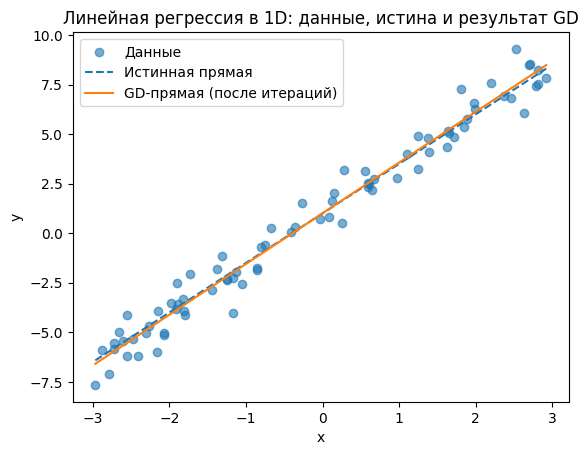

In [55]:

# Визуализация данных и финальной прямой
xx = np.linspace(x.min(), x.max(), 200)
yy_true = w_true * xx + b_true
yy_gd = w * xx + b

plt.figure()
plt.scatter(x, y, label="Данные", alpha=0.6)
plt.plot(xx, yy_true, label="Истинная прямая", linestyle="--")
plt.plot(xx, yy_gd, label="GD-прямая (после итераций)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия в 1D: данные, истина и результат GD")
plt.legend()
plt.show()


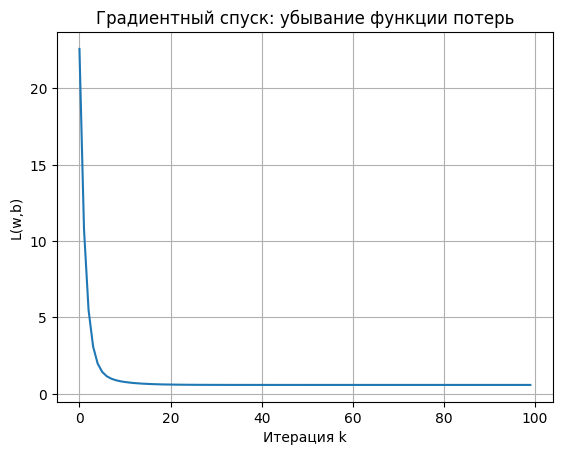

In [56]:

# График убывания функции потерь
plt.figure()
plt.plot(history_loss)
plt.xlabel("Итерация k")
plt.ylabel("L(w,b)")
plt.title("Градиентный спуск: убывание функции потерь")
plt.grid(True)
plt.show()



На графике видно, как функция потерь убывает по мере итераций.  
Мы можем также посмотреть, как по шагам меняются параметры $(w,b)$.


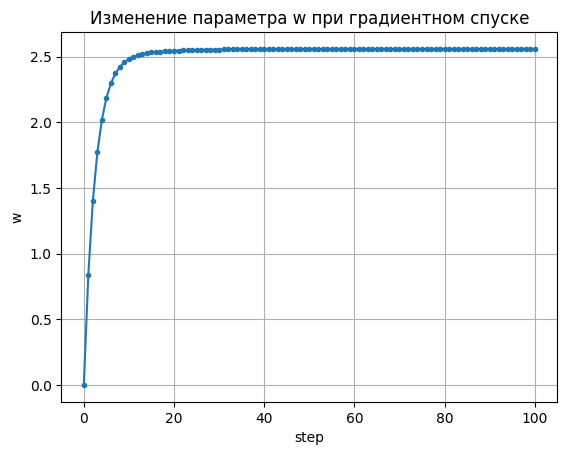

In [57]:

plt.figure()
plt.plot(history_w, marker="o", markersize=3)
plt.xlabel("step")
plt.ylabel("w")
plt.title("Изменение параметра w при градиентном спуске")
plt.grid(True)
plt.show()


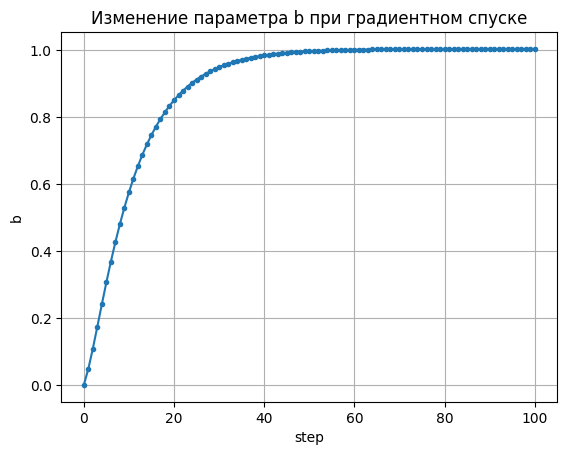

In [58]:

plt.figure()
plt.plot(history_b, marker="o", markersize=3)
plt.xlabel("step")
plt.ylabel("b")
plt.title("Изменение параметра b при градиентном спуске")
plt.grid(True)
plt.show()


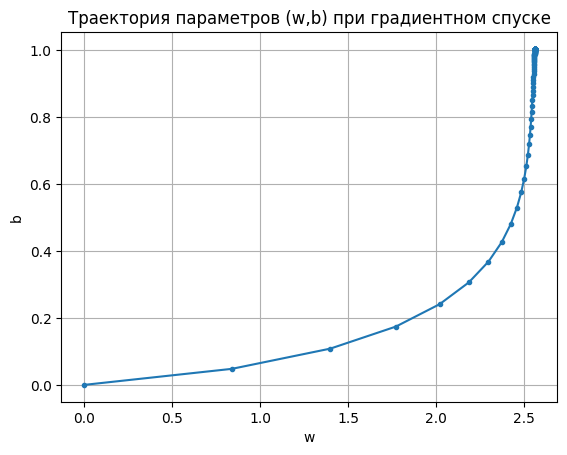

In [59]:

# Траектория (w,b) на плоскости параметров
plt.figure()
plt.plot(history_w, history_b, marker="o", markersize=3)
plt.xlabel("w")
plt.ylabel("b")
plt.title("Траектория параметров (w,b) при градиентном спуске")
plt.grid(True)
plt.show()



### 2.3 Шаг обучения (learning rate) и его влияние

Параметр $\eta$ (learning rate) играет ключевую роль:

- если $\eta$ **слишком маленький** — сходимся медленно;
- если $\eta$ **слишком большой** — шаги могут «перепрыгивать» минимум, и алгоритм будет расходиться.

Почувствовать это можно, поэкспериментировав с разными значениями $\eta$.


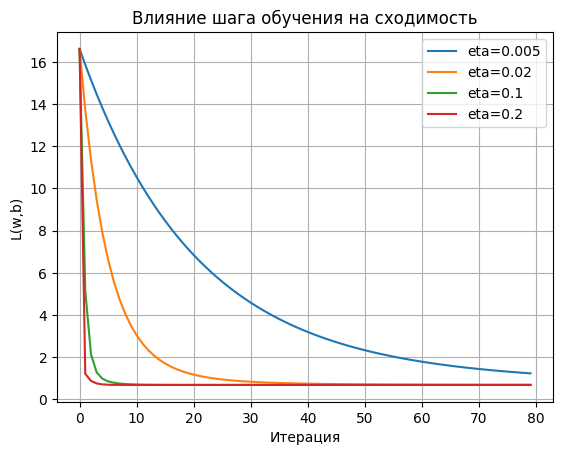

In [70]:

# Сравнение разных шагов обучения на той же задаче (только график потерь)
etas = [0.005, 0.02, 0.1, 0.2]
num_iters = 80

plt.figure()
for lr in etas:
    w = 0.0
    b = 0.0
    loss_history = []
    for k in range(num_iters):
        y_pred = w * x + b
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)
        dw, db = compute_gradients(w, b, x, y)
        w -= lr * dw
        b -= lr * db
    plt.plot(loss_history, label=f"eta={lr}")

plt.xlabel("Итерация")
plt.ylabel("L(w,b)")
plt.title("Влияние шага обучения на сходимость")
plt.legend()
plt.grid(True)
plt.show()



На графике можно увидеть типичную картину:

- маленький $\eta$ даёт плавную, но медленную сходимость;
- средний $\eta$ приводит к быстрой и стабильной сходимости;
- слишком большой $\eta$ может вызвать колебания или рост функции потерь.



## 3. Многомерный случай: градиент в матричной форме

Теперь рассмотрим линейную регрессию с несколькими признаками.

Пусть:
- $X \in \mathbb{R}^{n \times d}$ — матрица признаков,
- $w \in \mathbb{R}^{d \times 1}$ — вектор весов,
- $y \in \mathbb{R}^{n \times 1}$ — вектор ответов,
- предсказания: $\hat y = X w$.

Функция потерь (MSE):

$$
L(w) = \frac{1}{n} \|Xw - y\|_2^2 = \frac{1}{n} (Xw - y)^\top (Xw - y).
$$

Найдём градиент по $w$.



### 3.1 Вывод градиента в матричной форме

Обозначим вектор ошибок:
$$
e = Xw - y.
$$

Тогда:
$$
L(w) = \frac{1}{n} e^\top e.
$$

Градиент по $w$:

$$
\nabla_w L(w) = \frac{2}{n} X^\top (Xw - y).
$$

Это матричное обобщение 1D-градиента: в одномерном случае $X$ превращается в столбец из $x_i$, и формула совпадает с ранее полученной.



**Правило обновления параметров** в многомерном случае (batch gradient descent):

$$
w^{(k+1)} = w^{(k)} - \eta \, \frac{2}{n} X^\top (Xw^{(k)} - y).
$$

Здесь мы на каждой итерации используем **все** объекты выборки (полный градиент).



### 3.2 Пример: 2D признаки и градиентный спуск в матричной форме

Сгенерируем данные по модели:

$$
y = X w_{\text{true}} + \varepsilon,
$$

где $X$ имеет два признака, а затем обучим $w$ итерационным методом.


Истинные параметры: [ 1.5 -2. ]
Оценка (GD):        [ 1.489  -1.9843]


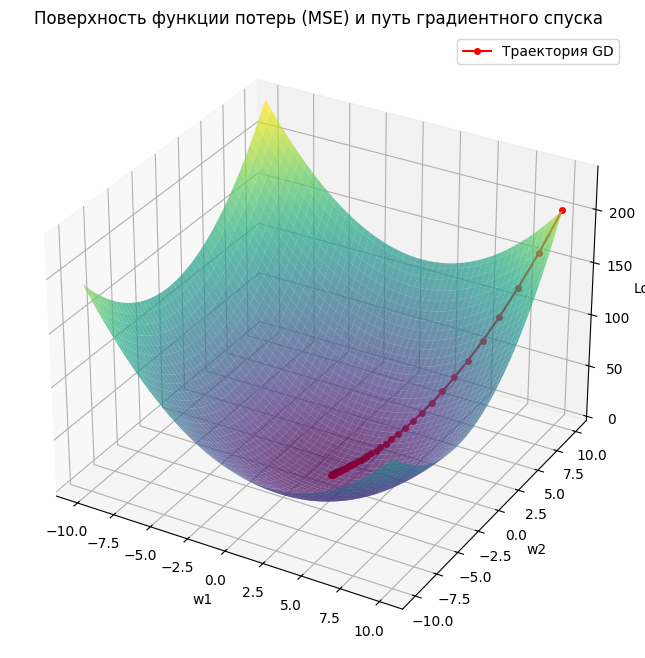

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rng = np.random.default_rng(42)

# ==== 1. Синтетические данные ====
n = 200
d = 2
X2 = rng.normal(0, 1, size=(n, d))

w_true_vec = np.array([1.5, -2.0]).reshape(-1,1)
b_true = 0.7

eps = rng.normal(0, 0.8, size=(n,1))
y2 = X2 @ w_true_vec + b_true + eps

# Для визуализации фиксируем b = b_true
b_fixed = b_true


# ==== 2. Поверхность функции потерь L(w1, w2) ====
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

L = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([W1[i,j], W2[i,j]]).reshape(-1,1)
        y_pred = X2 @ w + b_fixed
        L[i,j] = np.mean((y_pred - y2)**2)


# ==== 3. Градиент линейной регрессии по w ====
def grad_L_w(w_vec, X, y):
    n = X.shape[0]
    w = w_vec.reshape(-1,1)
    e = X @ w + b_fixed - y
    dw = (2/n) * (X.T @ e)
    return dw


# ==== 4. Запуск градиентного спуска (фиксируем b) ====
w = np.array([[10.], [10.]])
lr = 0.05
num_iters = 60

path_w1 = []
path_w2 = []
path_L  = []

for k in range(num_iters):
    path_w1.append(w[0,0])
    path_w2.append(w[1,0])
    y_pred_tmp = X2 @ w + b_fixed
    loss_value = np.mean((y_pred_tmp - y2) ** 2)
    path_L.append(loss_value)
    dw = grad_L_w(w, X2, y2)
    w = w - lr * dw


print("Истинные параметры:", w_true_vec.ravel())
print("Оценка (GD):       ", w.ravel())

# ==== 5. Отрисовка ====
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="3d")

# поверхность
ax.plot_surface(W1, W2, L, cmap="viridis", alpha=0.7)

# путь градиентного спуска
ax.plot(path_w1, path_w2, path_L,
        color="red", marker="o", markersize=4,
        label="Траектория GD")

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("Loss")
ax.set_title("Поверхность функции потерь (MSE) и путь градиентного спуска")
ax.legend()

plt.show()


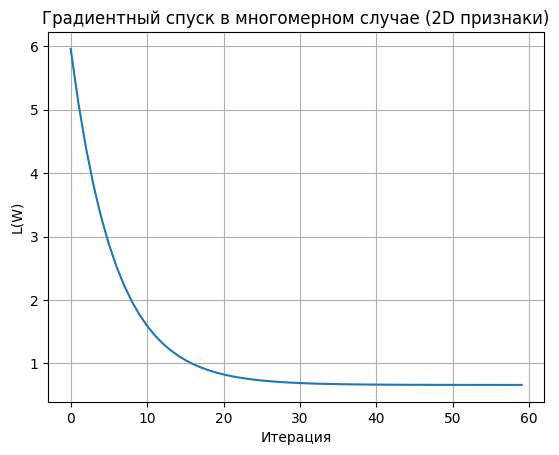

In [72]:

plt.figure()
plt.plot(path_L)
plt.xlabel("Итерация")
plt.ylabel("L(W)")
plt.title("Градиентный спуск в многомерном случае (2D признаки)")
plt.grid(True)
plt.show()



## 4. Варианты градиентного спуска: batch, stochastic, mini-batch

До сих пор мы использовали **batch gradient descent**: на каждой итерации градиент считается по всей выборке.

Есть ещё два варианта:

1. **Stochastic Gradient Descent (SGD)**  
   На каждом шаге используем **один случайный объект**:
   $$
   w^{(k+1)} = w^{(k)} - \eta \, \nabla_w \ell(\hat y_i, y_i).
   $$
   - шумный градиент, но дешёвый шаг;
   - часто быстрее на больших данных, особенно при онлайн-обучении.

2. **Mini-batch Gradient Descent**  
   Используем **небольшую группу объектов** (batch size 16, 32, 64, ...):
   $$
   w^{(k+1)} = w^{(k)} - \eta \, \frac{1}{m} \sum_{i \in \mathcal{B}_k} \nabla_w \ell(\hat y_i, y_i),
   $$
   где $\mathcal{B}_k$ — мини-батч размера $m$.

Mini-batch — стандартный выбор в практическом ML и особенно в нейросетях.



## 5. Масштаб признаков и скорость сходимости

В аналитическом решении МНК масштаб признаков не мешает получить формулу.  
Но в градиентном спуске масштаб признаков сильно влияет на сходимость.

Если один признак в диапазоне $[0, 1]$, а другой — в диапазоне $[0, 1000]$,  
то поверхность потерь становится «вытянутой», и градиентный спуск делает неэффективные шаги.

Обычно применяют **стандартизацию** (StandardScaler):

$$
x_j' = \frac{x_j - \mu_j}{\sigma_j},
$$

где $\mu_j$ — среднее признака, $\sigma_j$ — стандартное отклонение.

Важно:
- параметры нормализации считаем только по **обучающей выборке**;
- те же $\mu_j$ и $\sigma_j$ применяем к валидации и тесту (чтобы не было «подглядывания» в тест).



### 5.1 Визуальная иллюстрация влияния масштаба

Давайте сравним скорость сходимости градиентного спуска с нормализацией признаков и без неё на одной и той же задаче.


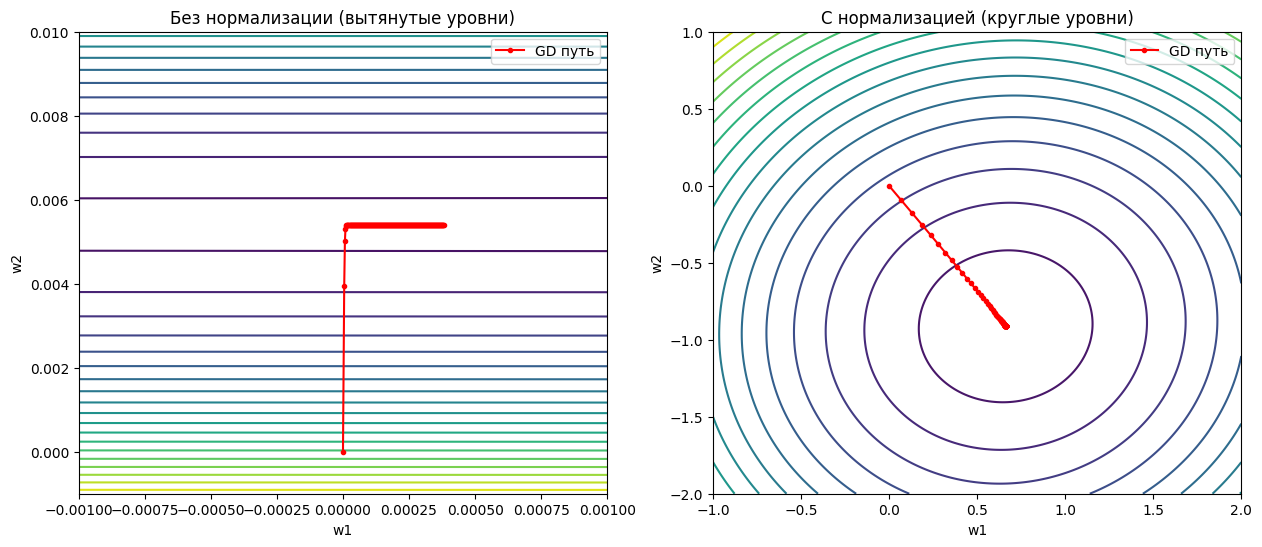

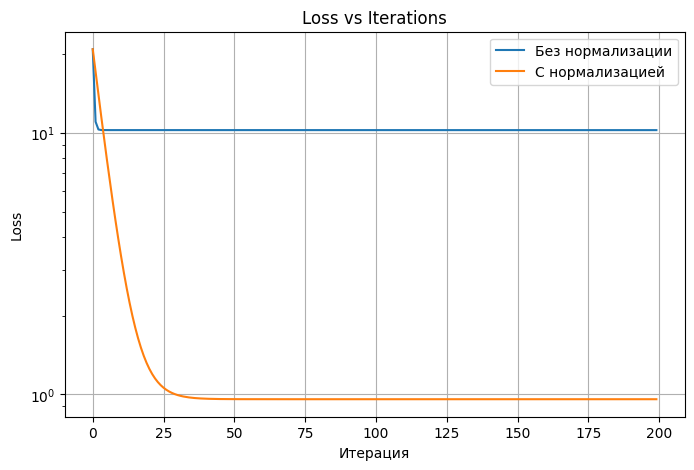

In [46]:
# ==== ВИЗУАЛИЗАЦИЯ ПОВЕРХНОСТЕЙ И ТРАЕКТОРИЙ ГРАДИЕНТНОГО СПУСКА ====

import numpy as np
import matplotlib.pyplot as plt

n = 200
x1 = rng.uniform(0, 1, size=n)             # маленький масштаб
x2 = rng.uniform(0, 1000, size=n)          # большой масштаб
X_raw = np.stack([x1, x2], axis=1)
w_true2 = np.array([2.0, -0.003]).reshape(-1,1)
b_true2 = 5.0
eps = rng.normal(0, 1.0, size=(n,1))
y_raw = X_raw @ w_true2 + b_true2 + eps

# Добавим столбец единиц
X_raw_aug = np.hstack([X_raw, np.ones((n,1))])


# Функция для получения значения MSE по (w1,w2,b)
def loss_val(X, y, w1, w2, b):
    W = np.array([w1, w2, b]).reshape(-1,1)
    pred = X @ W
    return np.mean((pred - y)**2)

def grad_L(W, X, y):
    """
    Градиент функции потерь MSE для линейной регрессии.
    X — матрица (n × d)
    W — вектор параметров (d × 1)
    y — ответы (n × 1)

    Возвращает градиент dL/dW (d × 1)
    """
    n = X.shape[0]
    e = X @ W - y            # вектор ошибок
    return (2.0 / n) * (X.T @ e)

# Функция, которая кроме обучения возвращает траекторию W(k)
def run_gd_track(X, y, eta, num_iters):
    W = np.zeros((X.shape[1], 1))
    losses = []
    traj = []

    for k in range(num_iters):
        traj.append(W.copy())
        y_pred = X @ W
        loss = np.mean((y_pred - y)**2)
        losses.append(loss)
        g = grad_L(W, X, y)
        W = W - eta * g

    return W, losses, traj


# ==== 1. Запуск GD ====

# Без нормализации
W_raw, loss_raw, traj_raw = run_gd_track(X_raw_aug, y_raw, eta=1e-6, num_iters=200)

# Нормализация признаков
X_scaled = (X_raw - X_raw.mean(axis=0, keepdims=True)) / X_raw.std(axis=0, keepdims=True)
X_scaled_aug = np.hstack([X_scaled, np.ones((n,1))])
W_scaled, loss_scaled, traj_scaled = run_gd_track(X_scaled_aug, y_raw, eta=0.05, num_iters=200)


# ==== 2. Подготовка данных для контуров ====

# Для raw данные очень вытянутые → берём узкий диапазон
w1_vals_raw = np.linspace(-0.001, 0.001, 200)
w2_vals_raw = np.linspace(-0.001, 0.01, 200)
W1_raw, W2_raw = np.meshgrid(w1_vals_raw, w2_vals_raw)

# Фиксируем b (берём финальное b из GD)
b_raw_fixed = W_raw[-1,0]

L_raw = np.zeros_like(W1_raw)
for i in range(W1_raw.shape[0]):
    for j in range(W1_raw.shape[1]):
        L_raw[i,j] = loss_val(X_raw_aug, y_raw, W1_raw[i,j], W2_raw[i,j], b_raw_fixed)

# Для нормализованных данных поверхность аккуратная → берём широкий диапазон
w1_vals_s = np.linspace(-1, 2, 200)
w2_vals_s = np.linspace(-2, 1, 200)
W1_s, W2_s = np.meshgrid(w1_vals_s, w2_vals_s)

b_scaled_fixed = W_scaled[-1,0]

L_scaled = np.zeros_like(W1_s)
for i in range(W1_s.shape[0]):
    for j in range(W1_s.shape[1]):
        L_scaled[i,j] = loss_val(X_scaled_aug, y_raw, W1_s[i,j], W2_s[i,j], b_scaled_fixed)


# ==== 3. Рисуем контуры + траектории ====

fig, ax = plt.subplots(1, 2, figsize=(15,6))

# ----- RAW -----
cs1 = ax[0].contour(W1_raw, W2_raw, L_raw, levels=20, cmap="viridis")
ax[0].set_title("Без нормализации (вытянутые уровни)")
ax[0].set_xlabel("w1")
ax[0].set_ylabel("w2")

path_raw = np.array([[W[0,0], W[1,0]] for W in traj_raw])
ax[0].plot(path_raw[:,0], path_raw[:,1], "r.-", label="GD путь")
ax[0].legend()

# ----- SCALED -----
cs2 = ax[1].contour(W1_s, W2_s, L_scaled, levels=20, cmap="viridis")
ax[1].set_title("С нормализацией (круглые уровни)")
ax[1].set_xlabel("w1")
ax[1].set_ylabel("w2")

path_scaled = np.array([[W[0,0], W[1,0]] for W in traj_scaled])
ax[1].plot(path_scaled[:,0], path_scaled[:,1], "r.-", label="GD путь")
ax[1].legend()

plt.show()


# ==== 4. Потери ====
plt.figure(figsize=(8,5))
plt.plot(loss_raw, label="Без нормализации")
plt.plot(loss_scaled, label="С нормализацией")
plt.yscale("log")
plt.xlabel("Итерация")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.grid(True)
plt.legend()
plt.show()



График показывает, что:

- без нормализации приходится брать очень маленький шаг $\eta$,
- с нормализацией можно взять существенно больший шаг и получить быструю сходимость.

Это одна из причин, почему **масштабирование признаков** — стандартный preprocessing для моделей, обучаемых градиентными методами.


Пример движения точки с отображенными линиями уровня

![GIF Image](grad_points.gif)

### Зачем нужна нормализация признаков (масштабирование)

Во многих моделях машинного обучения (линейная регрессия, логистическая регрессия, SVM, нейронные сети и др.) обучение происходит с помощью **градиентных методов**.  
В таких методах масштаб признаков напрямую влияет на форму функции потерь и скорость сходимости алгоритма.

Предположим, у нас есть два признака:
- первый принимает значения примерно от $0$ до $1$,
- второй — от $0$ до $1000$.

Из-за этого вклад второго признака в предсказания и в функцию потерь значительно больше.  
В результате уровни функции потерь $L(w)$ в пространстве параметров $(w_1, w_2)$ превращаются в **сильно вытянутые эллипсы**.

Это вызывает следующие проблемы:

- градиент вдоль одного направления получается очень большим,
- градиент вдоль другого направления — очень маленьким,
- градиентный спуск “мечется” между направлениями и сходится крайне медленно,
- если взять обычный шаг обучения $\eta$, метод может просто **разойтись**,
- чтобы добиться устойчивой сходимости, приходится брать **очень маленькое** $\eta$ (например, $10^{-6}$).

---

### Что делает нормализация

Чаще всего используют **стандартизацию**:

$$
x_j' = \frac{x_j - \mu_j}{\sigma_j},
$$

где:
- $x_j$ — исходный признак,
- $\mu_j$ — среднее значение признака по *обучающей выборке*,
- $\sigma_j$ — стандартное отклонение признака.

После стандартизации:

- все признаки имеют примерно одинаковый масштаб (среднее около $0$, стандартное отклонение около $1$),
- уровни функции потерь становятся **почти круглыми**,
- поверхность $L(w)$ «округляется»,
- градиентный спуск:
  - может использовать гораздо больший шаг $\eta$,
  - становится стабильнее,
  - сходится **быстрее в десятки и сотни раз**.

---

### Почему нормализацию нельзя считать по test

Параметры нормализации $\mu_j$ и $\sigma_j$ должны вычисляться **только по обучающей выборке**.  
Затем те же значения применяются к валидационной и тестовой выборке.

Это предотвращает утечку информации (**data leakage**) и имитирует реальную работу модели на новых данных.

---

### Итог

Нормализация делает оптимизацию проще и стабильнее:
- геометрия функции потерь становится более благоприятной,
- эллипсы уровней превращаются в почти окружности,
- можно использовать более крупный шаг $\eta$,
- сходимость ускоряется на порядки,
- обучение перестаёт зависеть от абсолютных масштабов признаков.



## 6. Выпуклость и сходимость

У линейной регрессии с MSE важное свойство: функция потерь **выпуклая**.

- В 1D это квадратичная функция от $(w,b)$ (параболоид).
- В многомерном случае это квадратичная форма:
  $$
  L(w) = \frac{1}{n} (Xw - y)^\top (Xw - y),
  $$
  которая при полном ранге $X$ строго выпукла.

Следствие:

- у функции потерь ровно **один глобальный минимум**;
- градиентный спуск при достаточно малом шаге $\eta$ **сойдётся к этому минимуму** (либо очень близко к нему).

В более сложных моделях (нейросети) поверхность потерь может быть **невыпуклой**, с большим числом локальных минимумов и седловых точек.  
Но для линейной регрессии градиентный спуск работает в очень благоприятных условиях.


## 7. Разбиение данных на train / validation / test

Чтобы модель машинного обучения работала не только на уже известных данных, но и на новых, её необходимо правильно оценивать.  
Если обучать и проверять модель на одних и тех же данных, мы получим:

1. **Переобучение (overfitting)**  
   Модель подстраивается под шум и частные особенности обучающей выборки.  
   Ошибка на обучении маленькая, но на новых данных модель работает плохо.

2. **Необъективную оценку качества**  
   Метрика будет слишком оптимистичной, потому что модель уже «видела» эти данные.

Поэтому данные делят на несколько частей.

---

### Обучающая выборка (train)

Используется для подбора параметров модели $w$:

$$
w^* = \arg\min_w L_{\text{train}}(w),
$$

где $L$ — функция потерь, например, среднеквадратичная ошибка:

$$
L_{\text{train}}(w) = \frac{1}{n}\|X_{\text{train}} w - y_{\text{train}}\|^2.
$$

---

### Валидационная выборка (validation)

Используется для выбора гиперпараметров, например:

- шага обучения $\eta$,
- числа итераций,
- силы регуляризации $\lambda$,
- структуры модели.

Модель обучается на train, но на validation мы измеряем качество:

$$
Q_{\text{val}} = \text{metric}(X_{\text{val}}, y_{\text{val}}, w).
$$

Выбираем те гиперпараметры, которые дают лучший результат на валидации.

---

### Тестовая выборка (test)

Используется **только один раз**, после выбора всех гиперпараметров:

$$
Q_{\text{test}} = \text{metric}(X_{\text{test}}, y_{\text{test}}, w^*).
$$

Тестовая метрика показывает, насколько хорошо модель будет работать **на новых данных из будущего**.

---

### Важное правило

- обучаем модель на **train**,
- подбираем гиперпараметры по **validation**,
- финальную оценку считаем по **test**.

---

### Препроцессинг тоже должен быть обучен только на train

Например, при стандартизации:

$$
x' = \frac{x - \mu_{\text{train}}}{\sigma_{\text{train}}}.
$$

Те же $\mu_{\text{train}}$ и $\sigma_{\text{train}}$ применяются к validation и test.  
Это предотвращает утечку информации и обеспечивает честную оценку качества.


Обученные параметры: [ 7.2365 -1.6405]


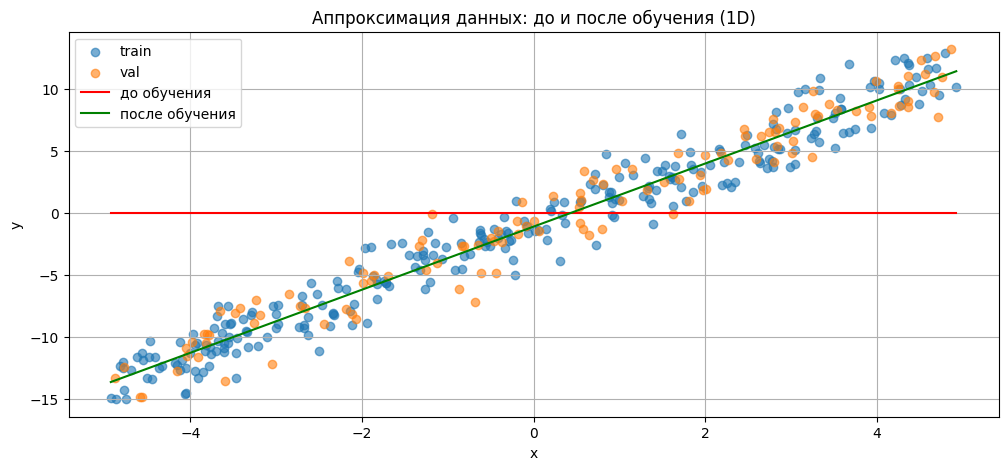

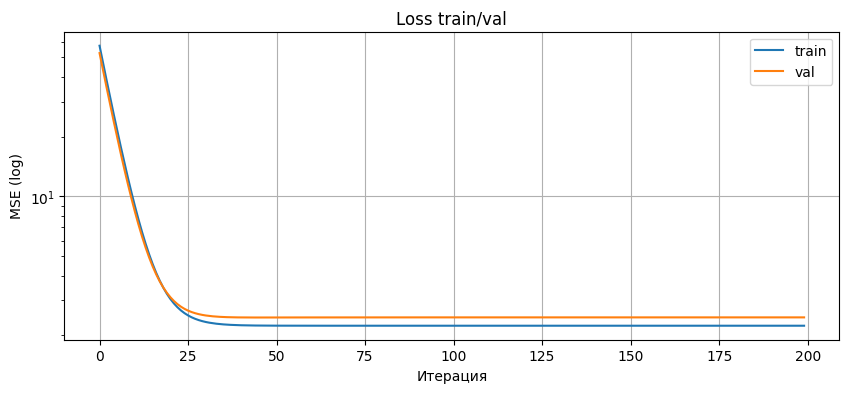

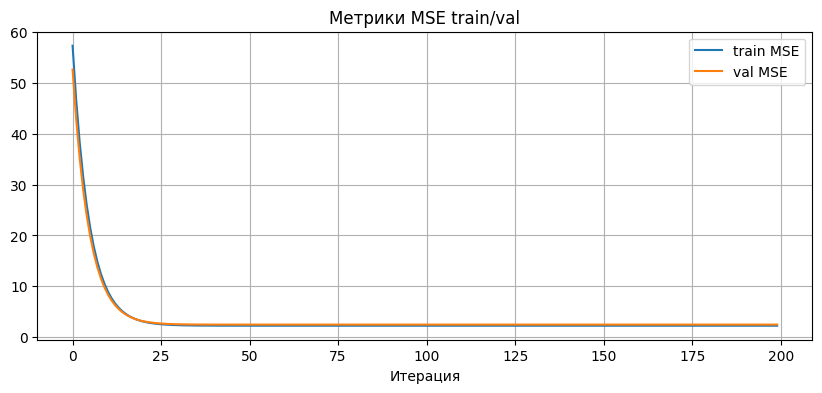

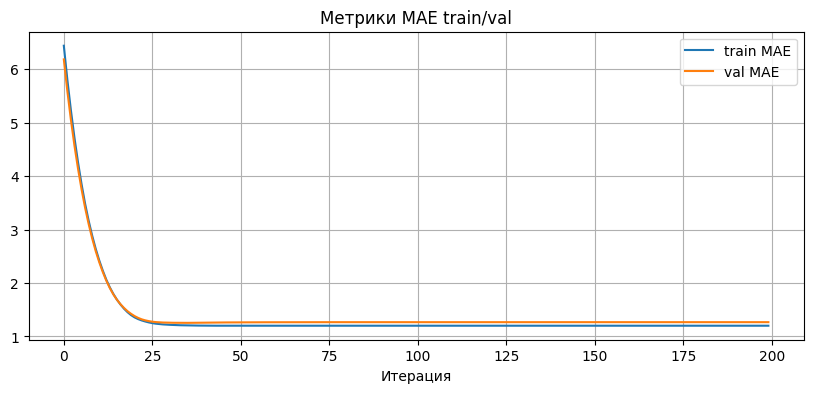

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(42)

# ============================================================
# 1. Генерация 1D данных
# ============================================================

n = 400
x = rng.uniform(-5, 5, size=(n, 1))
y = 2.5 * x - 1.0 + rng.normal(0, 1.5, size=(n,1))

# ============================================================
# 2. Разбиение на train/val
# ============================================================

X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# ============================================================
# 3. Нормализация (только по train)
# ============================================================

mean_train = X_train.mean()
std_train  = X_train.std()

X_train_norm = (X_train - mean_train) / std_train
X_val_norm   = (X_val   - mean_train) / std_train   # Важно!

# добавляем bias
def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

X_train_aug = add_bias(X_train_norm)
X_val_aug   = add_bias(X_val_norm)

# ============================================================
# 4. Градиентный спуск
# ============================================================

def grad_L(W, X, y):
    n = X.shape[0]
    e = X @ W - y
    return (2/n) * (X.T @ e)

def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def run_gd(X_train, y_train, X_val, y_val, eta=0.05, iters=200):
    W = np.zeros((2,1))  # [w, b]
    hist = {
        "train_loss": [],
        "val_loss": [],
        "train_mse": [],
        "val_mse": [],
        "train_mae": [],
        "val_mae": [],
        "W": []
    }

    for k in range(iters):
        hist["W"].append(W.copy())

        # train
        y_pred_train = X_train @ W
        mse_train = mse(y_train, y_pred_train)
        mae_train = mae(y_train, y_pred_train)

        # val
        y_pred_val = X_val @ W
        mse_val = mse(y_val, y_pred_val)
        mae_val = mae(y_val, y_pred_val)

        hist["train_loss"].append(mse_train)
        hist["val_loss"].append(mse_val)
        hist["train_mse"].append(mse_train)
        hist["val_mse"].append(mse_val)
        hist["train_mae"].append(mae_train)
        hist["val_mae"].append(mae_val)

        # шаг GD (только train)
        g = grad_L(W, X_train, y_train)
        W = W - eta * g

    return W, hist

W_learned, hist = run_gd(
    X_train_aug, y_train,
    X_val_aug, y_val,
    eta=0.05,
    iters=200
)

print("Обученные параметры:", W_learned.ravel())

# ============================================================
# 5. Визуализация: Train/Val точки и прямые до/после обучения
# ============================================================

plt.figure(figsize=(12,5))

# до обучения (нулевые веса)
W0 = np.zeros((2,1))

# рисуем
plt.scatter(X_train, y_train, label="train", alpha=0.6)
plt.scatter(X_val,   y_val,   label="val",   alpha=0.6)

grid = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
grid_norm = (grid - mean_train) / std_train
grid_aug  = add_bias(grid_norm)

y_pred_before = grid_aug @ W0
y_pred_after  = grid_aug @ W_learned

plt.plot(grid, y_pred_before, color="red", label="до обучения")
plt.plot(grid, y_pred_after,  color="green", label="после обучения")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Аппроксимация данных: до и после обучения (1D)")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 6. Loss (train/val)
# ============================================================

plt.figure(figsize=(10,4))
plt.plot(hist["train_loss"], label="train")
plt.plot(hist["val_loss"],   label="val")
plt.yscale("log")
plt.xlabel("Итерация")
plt.ylabel("MSE (log)")
plt.title("Loss train/val")
plt.grid(True)
plt.legend()
plt.show()

# ============================================================
# 7. Отдельный график метрик
# ============================================================

plt.figure(figsize=(10,4))
plt.plot(hist["train_mse"], label="train MSE")
plt.plot(hist["val_mse"],   label="val MSE")
plt.xlabel("Итерация")
plt.title("Метрики MSE train/val")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(hist["train_mae"], label="train MAE")
plt.plot(hist["val_mae"],   label="val MAE")
plt.xlabel("Итерация")
plt.title("Метрики MAE train/val")
plt.grid(True)
plt.legend()
plt.show()


## Недообучение и переобучение: ключевые понятия машинного обучения

В машинном обучении мы всегда хотим построить модель, которая не только хорошо описывает **обучающие данные**, но и делает корректные предсказания на **новых, невидимых данных**.  
Однако на практике часто возникают две фундаментальные проблемы:

- **недообучение (underfitting)**  
- **переобучение (overfitting)**

Эти явления встречаются в абсолютно всех моделях: от линейной регрессии до нейронных сетей.  
Понимание этих феноменов — критически важная часть навыка ML-инженера.

---

## 1. Недообучение (Underfitting)

Недообучение возникает, когда модель **слишком простая**, чтобы уловить закономерность в данных, или когда процесс обучения слишком короткий/недостаточный.

### **Типичные причины**
1. **Модель слишком мала по мощности**  
   Пример: попытка аппроксимировать нелинейную зависимость $y = x^3$ обычной линейной регрессией  
   → модель в принципе не может справиться.

2. **Слишком мало итераций обучения**  
   Например: градиентный спуск остановлен после 5 шагов  
   → веса почти не изменились → слабая аппроксимация.

3. **Слишком маленький шаг обучения $\eta$**  
   Модель двигается к минимуму настолько медленно, что за разумное время не успевает обучиться.

4. **Слишком сильная регуляризация**  
   Например: большая `L2`-регуляризация «зажимает» веса к нулю.

---

### **Признаки недообучения**

- **Высокая ошибка на train**  
  $L_{\text{train}}$ большое.

- **Ошибка на val такая же высокая**  
  $L_{\text{val}} \approx L_{\text{train}}$

- **train ≈ val ≈ плохо**

- **Графически:** модель почти не учитывает структуру данных  
  – прямой линии «не хватает наклона», она проходит почти горизонтально  
  или вообще не отражает зависимость.

---

### **Как бороться с недообучением**

1. **Увеличить мощность модели**
   - для линейной регрессии: добавить признаки (полиномиальные, взаимодействия)
   - для нейросетей: больше слоёв/нейронов

2. **Увеличить время обучения**
   - повысить число итераций/эпох

3. **Увеличить шаг обучения $\eta$**  
   (если был слишком маленьким)

4. **Ослабить регуляризацию**
   - уменьшить коэффициент $\lambda$ в L2 или L1

5. **Проверить корректность нормализации и данных**
   – иногда недообучение связано с “плохой” шкалой признаков.

---

## 2. Переобучение (Overfitting)

Переобучение происходит, когда модель **слишком хорошо подстраивается под обучающие данные**, включая шум, выбросы и случайные флуктуации.  
В итоге модель:

- идеально описывает train,  
- но плохо работает на val,  
- потому что «выучивает шум» вместо общей закономерности.

Это особенно ярко проявляется при слишком гибких моделях:  
нейронные сети, деревья, бустинг, **полиномиальные признаки высокой степени**, маленькая обучающая выборка.

---

### **Почему возникает переобучение**

1. **Модель слишком гибкая (большая мощность)**  
   Например: полином 15 степеней при 10 точках.  
   Модель способна построить «змейку», проходящую через каждую точку.

2. **Слишком мало данных**  
   Модель легко «запоминает» каждую точку.

3. **Слишком много признаков (или они плохо подготовлены)**  
   Проклятие размерности, шумовые фичи → модель начинает “подгонять” мусор.

4. **Отсутствие регуляризации**

5. **Слишком много итераций обучения**  
   Особенно в нейросетях: модель продолжает уменьшать train loss, но val loss начинает расти.

---

### **Признаки переобучения**

- **Очень низкая ошибка на train**
  $L_{\text{train}} \to 0$

- **Существенно большая ошибка на val**
  $L_{\text{val}} \gg L_{\text{train}}$

- **Разрыв train–val увеличивается**

- **Val loss начинает расти после определённой итерации**
  (классический график «U-образной» кривой)

- **Графически:**  
  Модель сильно изгибается, подстраиваясь под каждую точку train,  
  но ведёт себя хаотично между точками и на val.

Это и есть знаменитое:  
> *Модель обучилась слишком хорошо — и в этом проблема.*

---

## 3. Подходы к борьбе с переобучением

### 1. **Регуляризация**
- **L2** (ридж): штраф на большие веса  
  $L(w) = \|Xw - y\|^2 + \lambda \|w\|^2$
- **L1** (лассо): разреживание весов  
  $L(w) = \|Xw - y\|^2 + \lambda \|w\|_1$

Это “успокаивает” модель, делая её менее гибкой.

---

### 2. **Уменьшение сложности модели**
- понизить степень полинома,
- уменьшить количество признаков,
- уменьшить количество слоёв в нейросети.

---

### 3. **Больше данных**
Самый универсальный способ.  
Чем больше данных, тем меньше риска, что модель выучит шум.

---

### 4. **Ранняя остановка (Early Stopping)**  
Следим за $L_{\text{val}}$.  
Если начинает расти — прекращаем обучение.

---

### 5. **Data augmentation (в некоторых задачах)**  
Особенно в CV и NLP: увеличить разнообразие данных.

---

### 6. **Снижение learning rate на поздних этапах**  
Помогает избежать подгонки под шум.

---

### 7. **Кросс-валидация**  
Даёт более стабильную оценку качества и помогает обнаружить опасную вариативность.

---

## 4. Как соотносятся недообучение и переобучение: Bias–Variance Trade-off

Существует классическая концепция **баланса смещения и разброса**:

- Недообученная модель:  
  высокий **bias** (смещение), низкий variance  
  → слишком грубая модель

- Переобученная модель:  
  низкий bias, но высокий **variance**  
  → модель запомнила шум

Цель обучения — найти оптимальный баланс.

---

## 5. Практическое правило: «Смотрите на train и val одновременно»

| Состояние модели | Ошибка train | Ошибка val | Что происходит |
|------------------|--------------|------------|----------------|
| Недообучение     | высокая      | высокая    | Модель не выучила структуру |
| Хорошее обучение | низкая       | низкая/близкая к train | Отличная генерализация |
| Переобучение     | очень низкая | высокая    | Модель запомнила шум |

---

### Итог

Недообучение и переобучение — фундаментальные состояния модели.  
Любая практика в ML всегда сводится к поиску компромисса:

- **достаточная сложность**,  
- **достаточное обучение**,  
- **достаточная стабилизация (regularization)**,  
- **корректное сравнение train и val**.


Недообучение

Параметры underfitting: [ 0.5033 -0.1589]


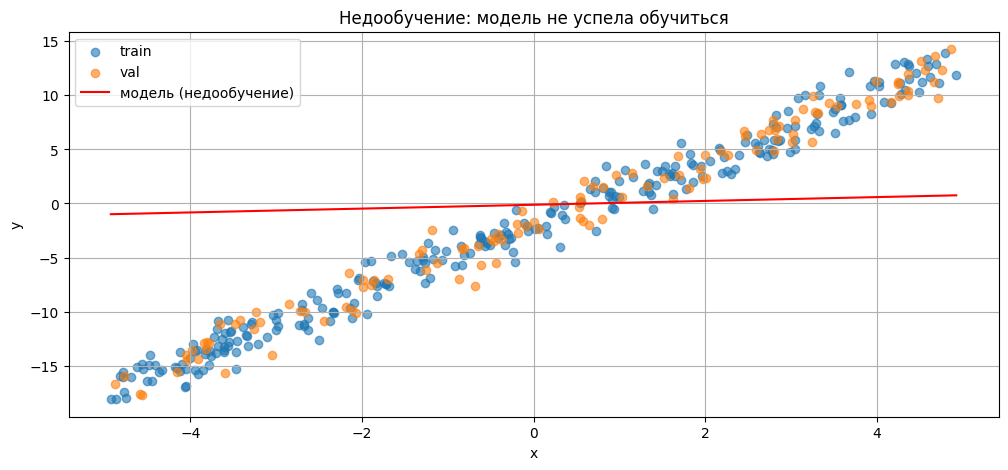

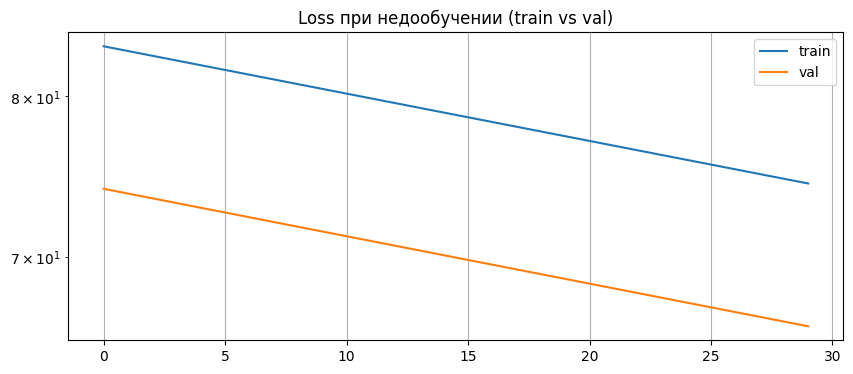

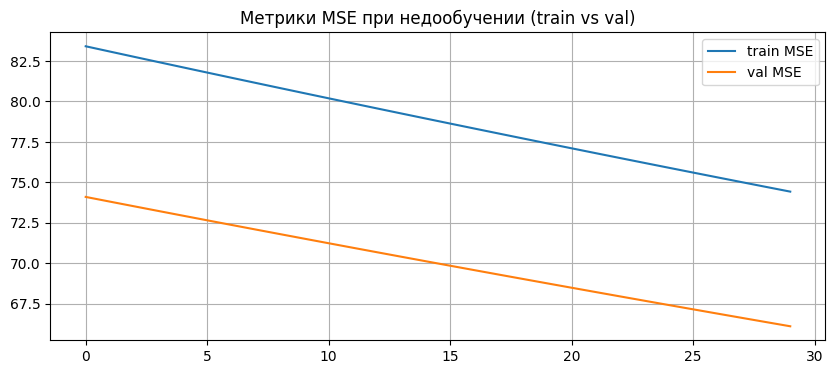

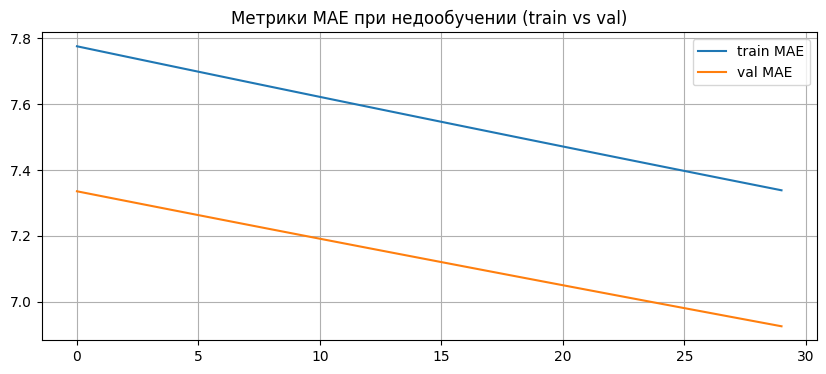

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(42)

# ====================================
# 1. Генерация 1D данных
# ====================================

n = 400
x = rng.uniform(-5, 5, size=(n, 1))
y = 3.0 * x - 2.0 + rng.normal(0, 1.2, size=(n,1))  # истинная линейная зависимость

# ====================================
# 2. Train / Val split
# ====================================

X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# ====================================
# 3. Нормализация (fit на train)
# ====================================

mean_train = X_train.mean()
std_train  = X_train.std()

X_train_norm = (X_train - mean_train) / std_train
X_val_norm   = (X_val - mean_train) / std_train

def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0],1))])

X_train_aug = add_bias(X_train_norm)
X_val_aug   = add_bias(X_val_norm)

# ====================================
# 4. Градиентный спуск
# ====================================

def grad_L(W, X, y):
    n = X.shape[0]
    e = X @ W - y
    return (2/n) * (X.T @ e)

def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def run_gd(X_train, y_train, X_val, y_val, eta, iters):
    W = np.zeros((2,1))
    history = {"train_loss": [], "val_loss": [],
               "train_mse": [],  "val_mse": [],
               "train_mae": [],  "val_mae": [],
               "W": []}

    for k in range(iters):
        history["W"].append(W.copy())

        y_pred_train = X_train @ W
        y_pred_val   = X_val   @ W

        mse_train = mse(y_train, y_pred_train)
        mse_val   = mse(y_val,   y_pred_val)
        mae_train = mae(y_train, y_pred_train)
        mae_val   = mae(y_val,   y_pred_val)

        history["train_loss"].append(mse_train)
        history["val_loss"].append(mse_val)
        history["train_mse"].append(mse_train)
        history["val_mse"].append(mse_val)
        history["train_mae"].append(mae_train)
        history["val_mae"].append(mae_val)

        g = grad_L(W, X_train, y_train)
        W = W - eta * g

    return W, history

# Недообучение: мало итераций
W_under, hist_under = run_gd(
    X_train_aug, y_train,
    X_val_aug,   y_val,
    eta=0.001,     # маленький шаг
    iters=30        # катастрофически мало итераций
)

print("Параметры underfitting:", W_under.ravel())

# ====================================
# 5. Визуализация
# ====================================

plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, label="train", alpha=0.6)
plt.scatter(X_val,   y_val,   label="val",   alpha=0.6)

grid = np.linspace(x.min(), x.max(), 200).reshape(-1,1)
grid_norm = (grid - mean_train) / std_train
grid_aug = add_bias(grid_norm)

y_pred_under = grid_aug @ W_under
plt.plot(grid, y_pred_under, color="red", label="модель (недообучение)")

plt.title("Недообучение: модель не успела обучиться")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# -------- L O S S --------
plt.figure(figsize=(10,4))
plt.plot(hist_under["train_loss"], label="train")
plt.plot(hist_under["val_loss"],   label="val")
plt.yscale("log")
plt.title("Loss при недообучении (train vs val)")
plt.grid(True)
plt.legend()
plt.show()

# -------- M E T R I C S --------
plt.figure(figsize=(10,4))
plt.plot(hist_under["train_mse"], label="train MSE")
plt.plot(hist_under["val_mse"],   label="val MSE")
plt.title("Метрики MSE при недообучении (train vs val)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(hist_under["train_mae"], label="train MAE")
plt.plot(hist_under["val_mae"],   label="val MAE")
plt.title("Метрики MAE при недообучении (train vs val)")
plt.grid(True)
plt.legend()
plt.show()


Переобучение

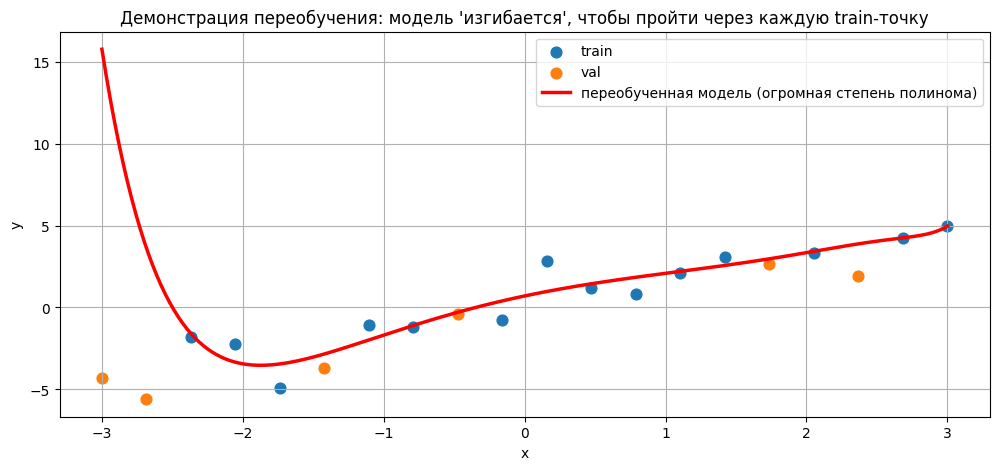

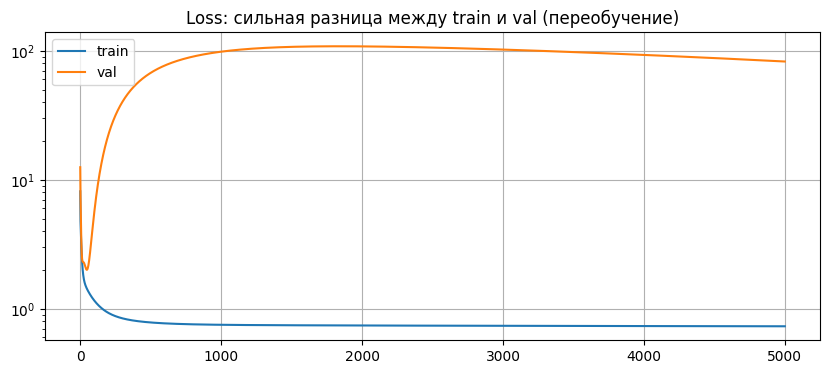

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

rng = np.random.default_rng(42)

# ============================================================
# 1. Небольшой набор точек → легко переобучить
# ============================================================

n = 20   # МАЛО данных → идеально для переобучения
x = np.linspace(-3, 3, n).reshape(-1,1)
y = 1.5 * x + rng.normal(0, 1.0, size=(n,1))  # почти линейная зависимость

# Добавим немного шума для "неровности"
y += rng.normal(0, 0.8, size=(n,1))

# Train / Val
X_train, X_val, y_train, y_val = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# ============================================================
# 2. Полиномиальные признаки очень высокой степени
# ============================================================

def poly_features(x, degree=20):
    return np.hstack([x ** k for k in range(1, degree+1)])

degree = 20
X_train_poly = poly_features(X_train, degree)
X_val_poly   = poly_features(X_val,   degree)

# Нормализация
mean_train = X_train_poly.mean(axis=0, keepdims=True)
std_train  = X_train_poly.std(axis=0,  keepdims=True)

X_train_norm = (X_train_poly - mean_train) / std_train
X_val_norm   = (X_val_poly   - mean_train) / std_train

# Добавляем bias
def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0],1))])

X_train_aug = add_bias(X_train_norm)
X_val_aug   = add_bias(X_val_norm)

# ============================================================
# 3. Градиентный спуск
# ============================================================

def grad_L(W, X, y):
    n = X.shape[0]
    e = X @ W - y
    return (2/n) * (X.T @ e)

def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

def run_gd(X_train, y_train, X_val, y_val, eta=0.05, iters=3000):
    W = np.zeros((X_train.shape[1], 1))
    hist = {"train_loss": [], "val_loss": []}

    for k in range(iters):
        y_pred_train = X_train @ W
        y_pred_val   = X_val   @ W

        hist["train_loss"].append(mse(y_train, y_pred_train))
        hist["val_loss"].append(mse(y_val,   y_pred_val))

        g = grad_L(W, X_train, y_train)
        W = W - eta * g

    return W, hist

W_over, hist_over = run_gd(
    X_train_aug, y_train, 
    X_val_aug,   y_val,
    eta=0.03,
    iters=5000
)

# ============================================================
# 4. ВИЗУАЛИЗАЦИЯ: МЕГА-ИЗГИБ (типичнейшее переобучение)
# ============================================================

plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, label="train", s=60)
plt.scatter(X_val,   y_val,   label="val",   s=60)

# построим кривую
grid = np.linspace(x.min(), x.max(), 400).reshape(-1,1)
grid_poly = poly_features(grid, degree)
grid_norm = (grid_poly - mean_train) / std_train
grid_aug  = add_bias(grid_norm)

y_pred = grid_aug @ W_over

plt.plot(grid, y_pred, color="red", linewidth=2.5, 
         label="переобученная модель (огромная степень полинома)")

plt.title("Демонстрация переобучения: модель 'изгибается', чтобы пройти через каждую train-точку")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 5. Loss train/val
# ============================================================

plt.figure(figsize=(10,4))
plt.plot(hist_over["train_loss"], label="train")
plt.plot(hist_over["val_loss"],   label="val")
plt.yscale("log")
plt.title("Loss: сильная разница между train и val (переобучение)")
plt.grid(True)
plt.legend()
plt.show()

w*x

w1*x + w2*x**2 + w3*x**3


In [65]:
X_train

array([[ 0.4737],
       [-2.0526],
       [ 2.6842],
       [ 2.0526],
       [ 1.1053],
       [-2.3684],
       [-0.1579],
       [ 3.    ],
       [-1.7368],
       [ 0.7895],
       [-0.7895],
       [ 0.1579],
       [ 1.4211],
       [-1.1053]])

In [66]:
X_train_poly

array([[ 4.7368e-01,  2.2438e-01,  1.0628e-01,  5.0345e-02,  2.3848e-02,
         1.1296e-02,  5.3508e-03,  2.5346e-03,  1.2006e-03,  5.6871e-04,
         2.6939e-04,  1.2760e-04,  6.0444e-05,  2.8632e-05,  1.3562e-05,
         6.4243e-06,  3.0431e-06,  1.4415e-06,  6.8279e-07,  3.2343e-07],
       [-2.0526e+00,  4.2133e+00, -8.6483e+00,  1.7752e+01, -3.6438e+01,
         7.4794e+01, -1.5352e+02,  3.1513e+02, -6.4684e+02,  1.3277e+03,
        -2.7253e+03,  5.5941e+03, -1.1483e+04,  2.3570e+04, -4.8380e+04,
         9.9306e+04, -2.0384e+05,  4.1841e+05, -8.5883e+05,  1.7629e+06],
       [ 2.6842e+00,  7.2050e+00,  1.9340e+01,  5.1912e+01,  1.3934e+02,
         3.7402e+02,  1.0040e+03,  2.6948e+03,  7.2335e+03,  1.9416e+04,
         5.2117e+04,  1.3989e+05,  3.7550e+05,  1.0079e+06,  2.7055e+06,
         7.2621e+06,  1.9493e+07,  5.2324e+07,  1.4045e+08,  3.7699e+08],
       [ 2.0526e+00,  4.2133e+00,  8.6483e+00,  1.7752e+01,  3.6438e+01,
         7.4794e+01,  1.5352e+02,  3.1513e+02,  

## Линейная модель и нелинейные признаки: почему модель начинает «изгибаться»

Стандартная формулировка линейной регрессии выглядит так:

$$
\hat y = w_1 x_1 + w_2 x_2 + \dots + w_d x_d + b.
$$

Отсюда может возникнуть типичное ожидание:

> Линейная модель должна порождать только линейную зависимость (прямую или гиперплоскость).

Однако это неверно.  
Правильное утверждение:

> Линейная регрессия — это модель, **линейная по параметрам** $w_i$,  
> но не обязательно линейная по исходным входам $x$.

---

## 1. Линейность модели означает линейность по весам, а не по входам

Функция считается линейной моделью, если она является **линейной комбинацией признаков**:

$$
\hat y = \sum_{j=1}^{d} w_j z_j + b.
$$

Где $z_j$ — **признаки**, поданные модели.

Если признаки заданы как:

$$
z_1 = x,\quad z_2 = x^2,\quad z_3 = x^3,\quad \dots,\quad z_{15} = x^{15},
$$

то модель имеет вид:

$$
\hat y = w_1 x + w_2 x^2 + \dots + w_{15} x^{15} + b.
$$

Это **полином 15-й степени**, который может иметь множество изгибов.

Но по параметрам $w_i$ эта функция по-прежнему линейна.  
Следовательно — это всё ещё *линейная модель*.

---

## 2. Признаки определяют функциональную форму модели

Очень важно понимать разделение:

- линейная модель → линейная комбинация признаков
- **признаки могут быть любыми**: преобразованными, нелинейными, составными

Пластичность модели определяется не только формой модели, но и тем, **какие признаки ей подали**.

Если признаки нелинейные → модель тоже становится нелинейной в исходном пространстве.

---

## 3. Что делает создание полиномиальных признаков

Если мы создаём признаки:

$$
z_j = x^j,
$$

то мы *расширяем входное пространство*:

$$
x \mapsto (x, x^2, x^3, \dots, x^m).
$$

После такого преобразования линейная регрессия строит гиперплоскость в новом пространстве $(z_1, \dots, z_m)$, но при отображении обратно в ось $x$ эта гиперплоскость превращается в **полиномиальную кривую высокой степени**.

Отсюда возникает эффект:

- модель может проходить *строго через каждую точку train*,  
- график получается сильно изогнутым, а иногда — сильно колеблющимся,  
- между опорными точками появляются неестественные «всплески».

Это и есть классическое **переобучение полиномиальной модели**.

---

## 4. Почему мы всё ещё считаем такую модель линейной

Функция остаётся линейной моделью потому что:

- параметры $w_1, \dots, w_m$ входят **линейно**,  
- функция потерь остаётся квадратичной,  
- градиент по параметрам остаётся линейным,  
- решение по-прежнему может быть найдено аналитически или через GD.

Нелинейность проявляется только в преобразовании исходного признака $x$ в новые признаки $z_j$.

---

## 5. Почему этот приём важен в ML

Понимание того, что:

> *линейная модель в пространстве признаков может стать нелинейной в исходном пространстве*

— это фундаментальный шаг к пониманию более сложных моделей:

- ядровые методы в SVM (kernel trick),  
- радиальные базисные функции (RBF),  
- нейронные сети (глубокие нелинейные преобразования признаков),  
- ансамбли деревьев,  
- трансформеры (сложные learned-преобразования эмбеддингов).

Везде ключевая идея одна:

### *Мы можем изменять пространство признаков, чтобы сделать сложные зависимости линейными в новом пространстве.*

---

## 6. Почему полиномы высокой степени дают «мега-изгиб»

Если взять:

- небольшое количество точек,
- высокую степень полинома (10–20),
- отсутствие регуляризации,

то модель получает достаточно гибкости, чтобы построить функцию, которая:

- проходит точно через все train-точки,
- делает резкие изгибы между ними,
- полностью проваливается на val.

Это классический пример **переобучения из-за слишком гибкого пространства признаков**.

---

### Итоговое резюме

- Линейная модель — это модель, линейная по параметрам, а не по входам.  
- Если входы преобразовать нелинейно (например, добавить $x^2, x^3, \dots$),  
  линейная регрессия становится нелинейной функцией в исходном пространстве.  
- Полиномиальные признаки позволяют линейной модели строить сложные кривые.  
- Это мощный инструмент, но он легко приводит к переобучению без регуляризации или достаточного числа данных.


### Какие ещё функции признаков можно использовать кроме полиномов?

Идея полиномиальных признаков — это лишь один частный случай более общего подхода:

> *Мы можем преобразовать исходные входы $x$ с помощью различных функций,  
> и затем обучать линейную модель на этих новых признаках.*

Это техника называется:
- **feature engineering**,  
- **базисные функции (basis functions)**,  
- **нелинейные преобразования признаков**,  
- **расширение пространства признаков (feature lifting)**.

Линейная модель остаётся линейной по параметрам, но её способность описывать сложные зависимости определяется тем,
какие функции мы вычисляем от $x$.

Ниже перечислены основные типы признаков, которые можно добавлять.

---

## 1. Полиномиальные признаки
$$
x,\; x^2,\; x^3,\; \dots
$$

Позволяют моделировать полиномиальные зависимости.

Используются в:
- классической регрессии,
- аппроксимации функций,
- некоторых эконометрических моделях.

---

## 2. Экспоненциальные и логарифмические функции
$$
\log(x),\quad x\log(x),\quad e^x,\quad \sqrt{x}.
$$

Применяются, когда данные растут/убывают неравномерно или следуют степенному закону.

---

## 3. Тригонометрические признаки
$$
\sin(x),\quad \cos(x),\quad \sin(2x),\quad \cos(2x),\dots
$$

Используются для:
- периодических зависимостей,
- сезонности,
- временных рядов.

Фактически, это основа:
- анализа сигналов,
- спектральных методов,
- преобразования Фурье.

---

## 4. Пороговые (step) и индикаторные функции
Например:

$$
z_j = \mathbb{1}(x > c_j).
$$

Позволяют строить кусочно-линейные зависимости.  
Это первый шаг в сторону идеи деревьев решений.

---

## 5. Функции-сплайны (spline basis)
Пример: B-сплайны, кубические сплайны.

Это гладкие кусочно-полиномиальные функции, позволяющие строить гибкие, но стабильные кривые.

Базис выглядит так:

- кубические полиномы на каждом участке,  
- «сшиваются» вместе с обеспечением гладкости первой и второй производных.

Сплайны используются в:
- статистике,
- медицине,
- эконометрике,
- моделировании нелинейных трендов.

---

## 6. Радиальные базисные функции (RBF)
Форма типа:

$$
\phi_j(x) = \exp\left(-\frac{(x - \mu_j)^2}{2\sigma_j^2}\right).
$$

Они позволяют описывать сложные формы:

- локальные всплески,  
- «горбы»,
- многомодальные зависимости.

Это ключевой элемент:
- RBF-сетей,
- некоторых SVM-ядер,
- методов интерполяции.

---

## 7. Преобразования категориальных признаков
- one-hot encoding  
- target encoding  
- embeddings  

Эти методы превращают категории в числовые признаки, на которых можно обучать линейную модель.

---

## 8. Ядровые методы (kernel trick)
Самый мощный подход:  
Мы вообще не создаём признаки вручную,  
а используем ядро:

$$
K(x_i, x_j) = \phi(x_i)^\top \phi(x_j),
$$

где $\phi(x)$ — *неявное* преобразование признаков в высокомерное пространство.

Примеры ядер:
- RBF,
- полиномиальное,
- сигмоидальное,
- лапласовское,
- спектральное.

Фактически, ядровые методы — это автоматическое создание сложных признаков.

---

## 9. Произвольные признаки, созданные руками
Например:
- $x_1 \cdot x_2$ (взаимодействие признаков),
- $\frac{x_1}{x_2}$,
- среднее за окно времени,
- градиенты временных рядов,
- статистические функции.

Этот подход называется **feature engineering**,  
и он был основным инструментом ML до эпохи глубокого обучения.

---

## Ключевая мысль

> *Сложность линейной модели определяется не формой модели,  
> а тем, какие признаки мы ей подаём.*

Линейная регрессия сама по себе проста,  
но при грамотном преобразовании входов она способна моделировать очень сложные зависимости — вплоть до произвольных форм.

Именно поэтому понимание **трансформации признаков** — фундаментальная часть классического ML.




## 7. Резюме части 2

- Градиентный спуск — **универсальный итерационный метод оптимизации**, который обновляет параметры в направлении убывания функции потерь.
- Для линейной регрессии с MSE в 1D мы получили явные формулы для $\frac{\partial L}{\partial w}$ и $\frac{\partial L}{\partial b}$.
- В многомерном случае градиент записывается компактно: 
  $$
  \nabla_w L(w) = \frac{2}{n} X^\top (Xw - y).
  $$
- Мы реализовали градиентный спуск руками и увидели, как убывает функция потерь и как параметры $(w,b)$ движутся к оптимуму.
- Обсудили важность **шага обучения** и показали, как его изменение влияет на сходимость.
- Рассмотрели варианты **batch, stochastic, mini-batch gradient descent**.
- Показали, что **масштаб признаков** сильно влияет на скорость сходимости, и зачем нужна нормализация.
- Напомнили, что в линейной регрессии с MSE функция потерь выпукла, поэтому градиентный спуск ведёт к глобальному минимуму.
- Супер важно разбивать выборку!
- Проблема недообучения/переобучения
- Полиномиальный трюк и т.п.